# Model

In [38]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [39]:
df_clean = pd.read_csv("data/data_num.csv")

In [40]:
df_clean 

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0,0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0,0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0,0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0,0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0,0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0,1
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0,0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0,0


In [41]:
df_sample = df_clean.sample(n = 2500, random_state = 1)

In [42]:
df_sp = df_sample.drop(["index", "latitude", "longitude"], axis = 1)

In [43]:
df_sp

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
11418,22.0,4232.0,624.0,2408.0,660.0,6.6539,284900.0,1,0,0,0,0,0
6821,28.0,3342.0,688.0,2210.0,647.0,3.4596,202800.0,1,0,0,0,0,0
9138,15.0,2181.0,361.0,1057.0,300.0,4.6250,118100.0,0,1,0,0,0,0
4175,15.0,2226.0,421.0,1004.0,417.0,2.7868,117800.0,0,1,0,0,0,0
15220,7.0,2773.0,530.0,1374.0,505.0,2.6214,103800.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,45.0,1839.0,459.0,1312.0,460.0,2.5625,138000.0,1,0,0,0,0,0
232,35.0,2104.0,434.0,1225.0,410.0,4.8214,242900.0,0,0,0,1,0,1
9974,45.0,2457.0,445.0,1129.0,422.0,4.0588,182800.0,0,0,0,1,0,1
15894,26.0,2442.0,659.0,1134.0,624.0,3.3274,295500.0,0,0,0,0,1,1


## define predictor and outcomes variables 

In [59]:
X = df_sp.drop(["median_house_value"], axis = 1)
y = df_sp["median_house_value"]

## RANSAC regression model 

In [66]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# Creating a synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Initializing the RANSAC regressor model
ransac = RANSACRegressor()

# Fitting the model to your data
ransac.fit(X, y)

# Making predictions using the model
y_pred = ransac.predict(X)

# Calculate the mean squared error and R-squared values
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients : ", ransac.estimator_.coef_)
print("Biais : ", ransac.estimator_.intercept_)

Mean Squared Error: 0.009339623137880153
R-squared: 0.9999984844121468
Coefficients :  [87.22691856]
Biais :  -0.010260459162212854


## Create linear regression model

Cross_val_score 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object
reg = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(reg, X, y, cv=5)

# Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.08)


In [46]:
import statsmodels.api as sm

X = sm.add_constant(X)

In [47]:
# Train test split 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Linear regression model

model = sm.OLS(train_y, train_X)
model = model.fit()
print(model.summary2())

                            Results: Ordinary least squares
Model:                     OLS                      Adj. R-squared:           0.651     
Dependent Variable:        median_house_value       AIC:                      50112.9392
Date:                      2023-01-30 03:22         BIC:                      50185.7509
No. Observations:          2000                     Log-Likelihood:           -25043.   
Df Model:                  12                       F-statistic:              312.4     
Df Residuals:              1987                     Prob (F-statistic):       0.00      
R-squared:                 0.654                    Scale:                    4.4320e+09
----------------------------------------------------------------------------------------
                       Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
----------------------------------------------------------------------------------------
const              -1850363.5314 212816.7763  -8.6

Info : 

- no.observation is 10547 (80% of the overall dataset)
- R-squared (goodness of the model from 0 to 1) is 0.631
- p-value >0.05 for some predictors: meaning that we would consider removing these variables from the predictors list! It is because p-values determine whether the relationships that we observe in this sample also exist in the larger population.

## Predict on test set

We will use model.predict on the test_X and compare the predictions with the actual test_y values.

In [48]:
predictions = model.predict(test_X)

df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predictions})

In [49]:
df_results

,Actual,Predicted
15217,91700.0,185098.277332
2293,116700.0,132659.370591
6847,139000.0,172212.260420
4893,128500.0,124722.299962
12023,68000.0,69367.644553
...,...,...
14810,236200.0,273262.782017
387,176100.0,231931.271603
10865,411900.0,329059.015024
7266,500001.0,461921.439405


## Evaluate the model 

Let's find RMSE and R2 

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
print('RMSE:', RMSE, 'R2 :',r2)

RMSE: 71169.53780150675 R2 : 0.6398591656140775


## Model assumptions

Before we built a linear regression model, we make the following assumptions:

- Linearity: The relationship between X and the mean of Y is linear.
- Normality: The residuals follow a normal distribution and the expected mean of the residuals is zero.
- Homoscedasticity: The variance of residual is constant for all values of X.
- No autocorrelation: Residuals are independent of each other.
- No multicollinearity: There is no high correlation between predictor variables.

### Linearity

We will test linearity with a scatter plot to see predicted values versus the actual values. Ideally, the data points should lie around the diagonal line on the plot.

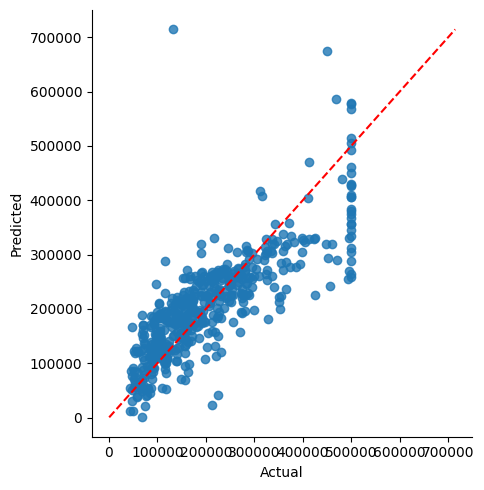

In [51]:
# Plot the actual vs predicted results
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plot the diagonal line 
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In my dataset, i can see that there is not a perfect relashionship. On the lower values our predictions are biased 

### Normality

We will test normality by checking with the quantile-quantile plot, Q-Q plot.

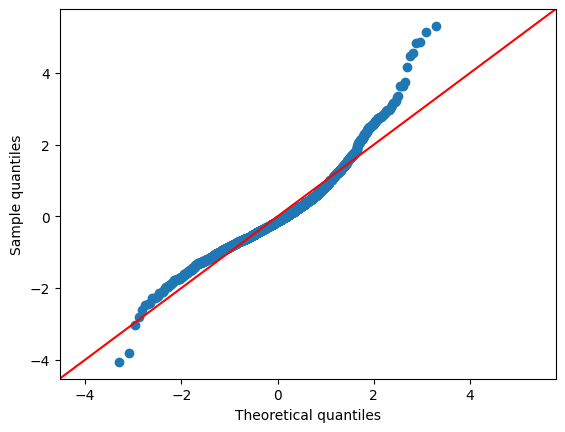

In [52]:
from statsmodels.graphics.gofplots import qqplot 

fig = qqplot(model.resid_pearson, line = '45', fit = 'True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

We can see that our model biasing

### Homoscedasticity

We will test homoscedasticity by plotting the residuals and checking if the variance is uniform.

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


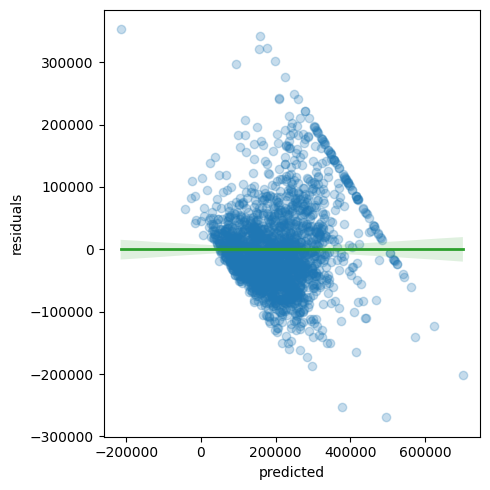

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

We can say that the distribution of our residuals is not completely uniform.

### No Autocorrelation

We will perform the Durbin-Watson test to determine if the no autocorrelation assumption holds.

In [54]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(model.resid)
print("Durbin-Watson:", durbinWatson)

Durbin-Watson: 1.9657668770779975


The Durbin-Watson statistic ranges between 0 and 4 : 
- A value of 2.0 means that there is no autocorrelation. 
- Values between 0 and 2 indicate positive 
- values between 2 and 4 indicate negative autocorrelation. 

In our case, Durbin-Watson statistic is very close to 2.0 therefore we can say that no autocorrelation assumption is not violated.

### No Multicolinearity

We will plot a heatmap to see the correlation between predictors visually and we will also calculate the variance inflation factor (VIF), which measures the multicollinearity among the independent variables.

In [55]:
mask = np.zeros_like(train_X.drop("const", axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_X.drop("const", axis=1).corr().round(2), annot=True, mask=mask, cmap="cividis")

<AxesSubplot:>

And we calculate VIF:

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(X.columns)):
    v=vif(np.matrix(X),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,2)))

Variance inflation factor for const: 0.0
Variance inflation factor for longitude: 17.06
Variance inflation factor for latitude: 18.55
Variance inflation factor for housing_median_age: 1.37
Variance inflation factor for total_rooms: 13.51
Variance inflation factor for total_bedrooms: 33.96
Variance inflation factor for population: 6.34
Variance inflation factor for households: 30.17
Variance inflation factor for median_income: 1.91
Variance inflation factor for _<1H OCEAN: inf
Variance inflation factor for _INLAND: inf
Variance inflation factor for _ISLAND: inf
Variance inflation factor for _NEAR BAY: inf
Variance inflation factor for _NEAR OCEAN: inf
Variance inflation factor for outlier: 3.84


/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Info : 
- A VIF of 1 indicates two variables are not correlated
- A VIF between 1 and 5 indicates a moderate correlation 
- And a VIF above 5 indicates a high correlation.

As result shows we have 5 high correlated and 2 moderately correlated variables. It is better if we get rid of some of them.

### BONUS: Outliers

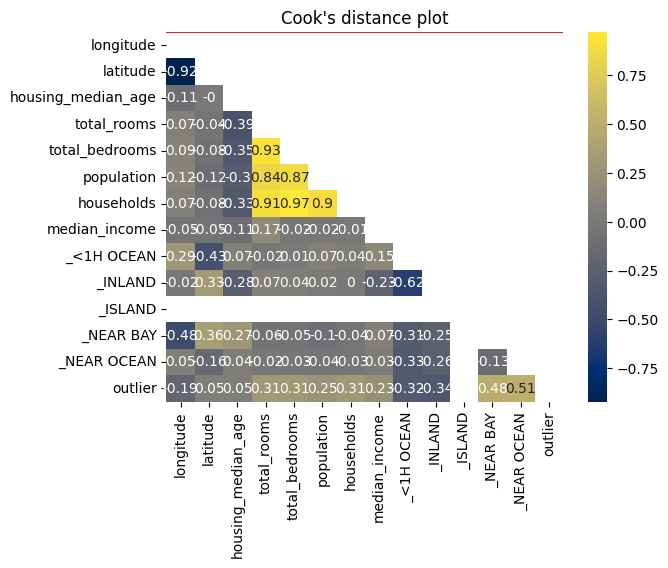

In [57]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

inf=influence(model)
(i, d) = inf.cooks_distance
plt.title("Cook's distance plot")
plt.stem(np.arange(len(i)), i, markerfmt=",")
plt.show()

From Cook’s plot, we can understand which are the observations we need to pay more attention to and decide whether to drop them or not. (As a rule, the observation has a high influence if the Cook’s distance is greater than 4/N-k-1 ( N=number of observations, k= number of predictors, yellow horizontal line in the plot)

### BONUS: Influence plot

Influence plots show the studentized residuals versus the leverage of each observation as measured by the hat matrix.

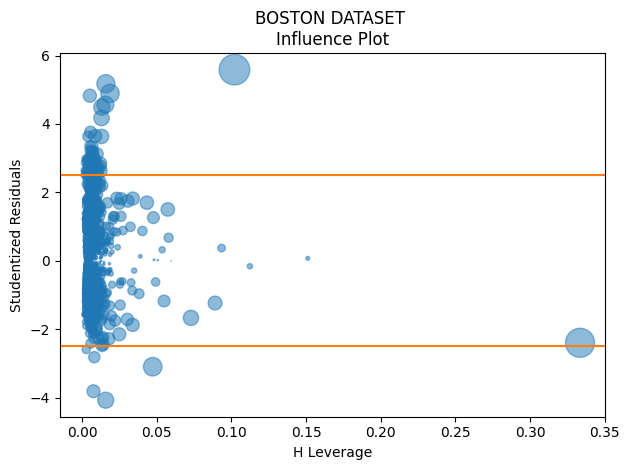

In [58]:
from statsmodels.stats.outliers_influence import OLSInfluence 
influence = OLSInfluence(model)
fig, ax = plt.subplots()
ax.axhline(-2.5, linestyle='-', color='C1')
ax.axhline(2.5, linestyle='-', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
 s=1000 * np.sqrt(influence.cooks_distance[0]),
 alpha=0.5)
ax.set_xlabel('H Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title("BOSTON DATASET \nInfluence Plot")
plt.tight_layout()
plt.show()

In the dataset we can see that some data points have low leverage but large or low residuals. These highly influential data points need a delicate evaluation before including in the model.